## 선형 회귀와 MSE 손실 함수의 Convex 함수 시각화 해보기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### `X, Y = np.meshgrid(x_range, y_range)`

- 2차원 그리드 포인트의 모든 조합을 생성

- 입력 받는 1D 배열: `x_range`, `y_range`

- 반환되는 배열의 크기
    - 두 배열 모두 행과 열의 수가 동일하다.
    - **행의 수**: 두 번째 인자의 크기(`y_range`)
    - **열의 수**: 첫 번째 인자의 크기(`x_range`)

- 반환되는 배열의 내용
    1. 첫 번째 배열 `X`
        - **각 행** 에는 `x_range`의 모든 값들이 그대로 복사
        - `X`의 **각 행** 은 `x_range`와 동일한 값을 가진다.
        - 이 과정이 `y_range` 의 길이만큼 반복

    2. 두 번째 배열 `Y`:
        - **각 열** 에는 `y_range`의 모든 값들이 그대로 복사
        - `Y`의 **각 열** 은 `y_range`의 값들을 세로로 늘어놓은 것과 같다.
        - 이 과정이 `x_range`의 길이만큼 반복


```
# Input
x_range = [x₁, x₂, x₃, ..., xₙ]
y_range = [y₁, y₂, y₃, ..., yₘ]

# Output
X = [
     [x₁, x₂, x₃, ..., xₙ],
     [x₁, x₂, x₃, ..., xₙ],
     ...
     [x₁, x₂, x₃, ..., xₙ]
    ]

Y = [
     [y₁, y₁, y₁, ..., y₁],
     [y₂, y₂, y₂, ..., y₂],
     ...
     [yₘ, yₘ, yₘ, ..., yₘ]
    ]
```

In [2]:
x_range = np.array([1, 2, 3])  # a_range
y_range = np.array([10, 20])  # b_range
print("x_range:", x_range)
print("-" * 10)
print("y_range:", y_range)

x_range: [1 2 3]
----------
y_range: [10 20]


In [3]:
A, B = np.meshgrid(x_range, y_range)

print(A)
print("-" * 10)
print(B)

[[1 2 3]
 [1 2 3]]
----------
[[10 10 10]
 [20 20 20]]


In [4]:
x_data = np.linspace(0, 1, 500)
y_data = 2 * x_data + 1 + np.random.normal(0, 0.3, 500)  # y = 2x + 1 + 노이즈

# 파라미터 공간 (기울기 a, 절편 b)
a_range = np.linspace(0, 4, 500)  # 실제값(2) 주변으로 설정
b_range = np.linspace(-1, 3, 500)  # 실제값(1) 주변으로 설정

A, B = np.meshgrid(a_range, b_range)

In [5]:
# Z 값 계산(by for-loop)
def cal_mse(a, b, x, y):
    """MSE 계산 함수"""
    y_pred = a * x + b
    return np.mean((y - y_pred) ** 2)


Z = np.zeros_like(A)  # A 크기 만큼 메모리 할당
for i in range(len(b_range)):
    for j in range(len(a_range)):
        # 각 파라미터의 점마다의 손실 계산
        Z[i, j] = cal_mse(A[i, j], B[i, j], x_data, y_data)

In [6]:
# Z 값 계산(by Broadcasting)
# x를 새로운 축으로 확장 (a, b와 브로드캐스팅하기 위해)
x_reshaped = x_data[:, np.newaxis, np.newaxis]  # shape: (n_samples, 1, 1)
y_reshaped = y_data[:, np.newaxis, np.newaxis]  # shape: (n_samples, 1, 1)

# 예측값 계산 (브로드캐스팅 활용)
y_pred = A * x_reshaped + B  # shape: (n_samples, a_points, b_points)

# MSE 계산 (샘플 축으로 평균)
Z = np.mean((y_reshaped - y_pred) ** 2, axis=0)

- Z 를 계산할 때, 두 방식의 시간 차이를 보면 Broadcasting 을 사용하는 것이 훨씬 효율적인 것을 알 수 있다.
- NumPy 관련 계산을 할 때는 최대한 반복문을 지양해야한다.
- 특히 그리드 크기가 클수록(여기서는 500x500) 속도 차이가 더 크게 나타난다.
- 일반적으로 큰 데이터를 처리할 때는 NumPy의 벡터화 연산이 for 루프보다 수십 배에서 수백 배까지 빠를 수 있다.

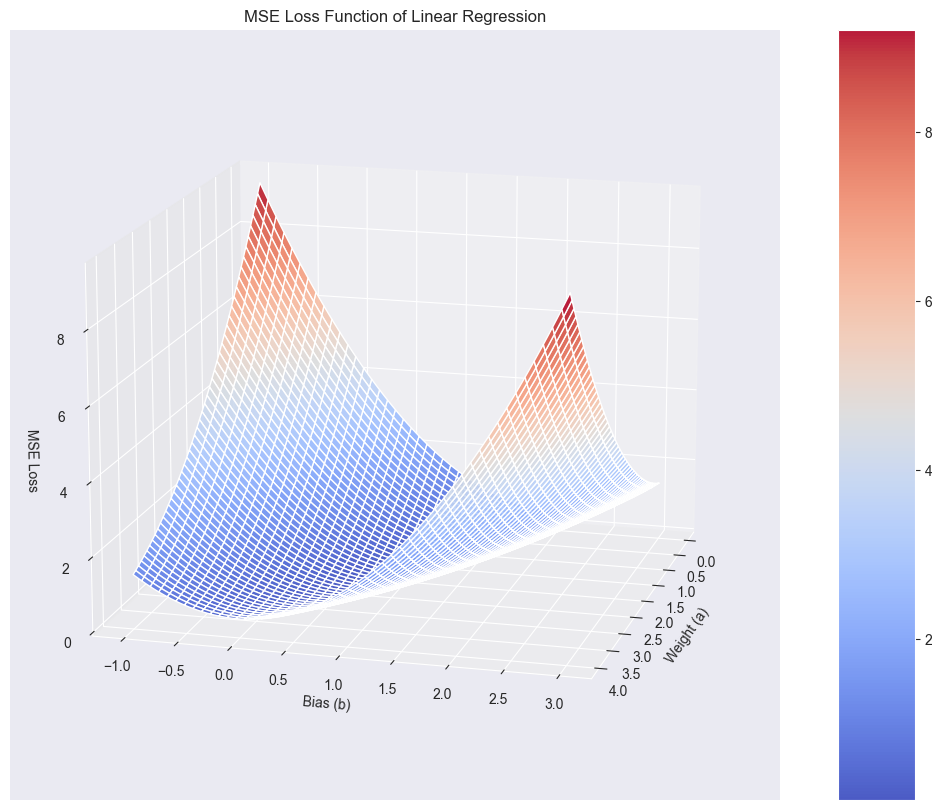

In [7]:
# 3D 그래프 그리기
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(A, B, Z, cmap="coolwarm", alpha=0.9)

ax.set_xlabel("Weight (a)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("MSE Loss")
ax.set_title("MSE Loss Function of Linear Regression")

# 시점 조정 (그릇 모양을 잘 보이게)
# elev(elevation): 고도 90° ~ 90°, azim(azimuth): 방위각 0° ~ 360°
ax.view_init(elev=15, azim=15)

# 컬러바 추가
plt.colorbar(surf, ax=ax, aspect=10)

plt.show()

위 그래프가 흔히 convex 함수를 검색했을 때 나오는 볼록한 그릇 모양이 안 되는 이유는,
- 선형 회귀 모델과 MSE 손실함수의 convex 함수이기 때문이다.
- 선형 회귀의 MSE 손실 함수는 수학적으로 항상 볼록(convex)하다.
- 하지만 선형 회귀에서는 **특별히 특정한 형태의 볼록 함수** 를 가진다.
- 수학적으로는 **2차 함수(quadratic function)** 형태이다.
- 2차 함수 형태의 손실 함수는 "완벽한 그릇" 모양이 아닌, **타원형 포물면(elliptic paraboloid)** 형태를 가진다.

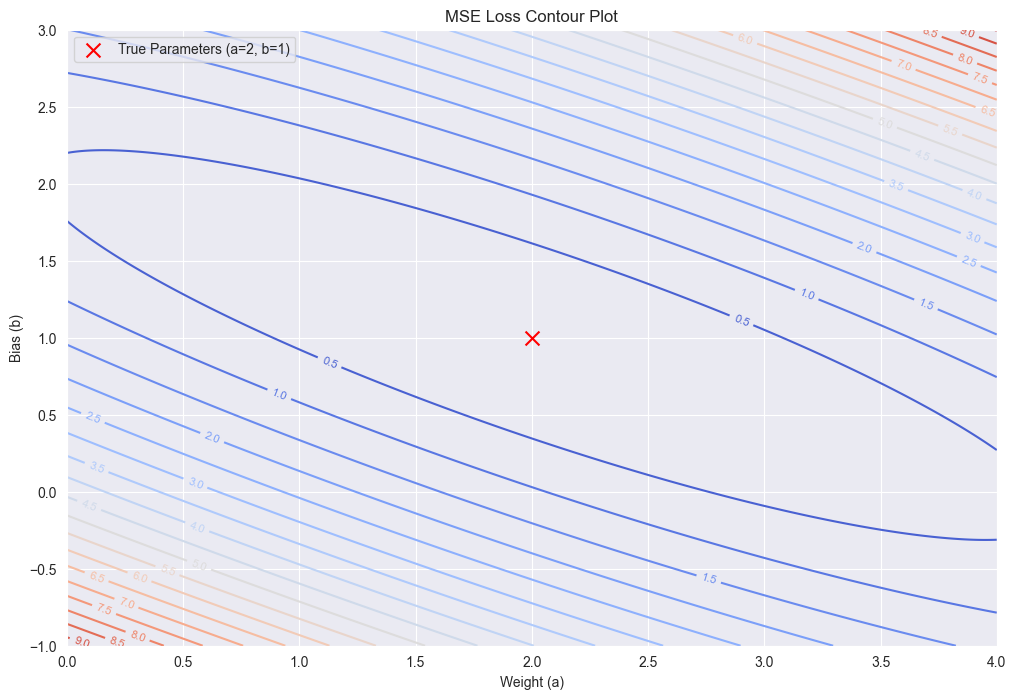

In [8]:
# 등고선
plt.figure(figsize=(12, 8))
contour = plt.contour(A, B, Z, 20, cmap="coolwarm")
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(2, 1, color="red", marker="x", s=100, label="True Parameters (a=2, b=1)")

plt.xlabel("Weight (a)")
plt.ylabel("Bias (b)")
plt.title("MSE Loss Contour Plot")
plt.grid(True)
plt.legend()

plt.show()

## 비선형 구조와 상관계수

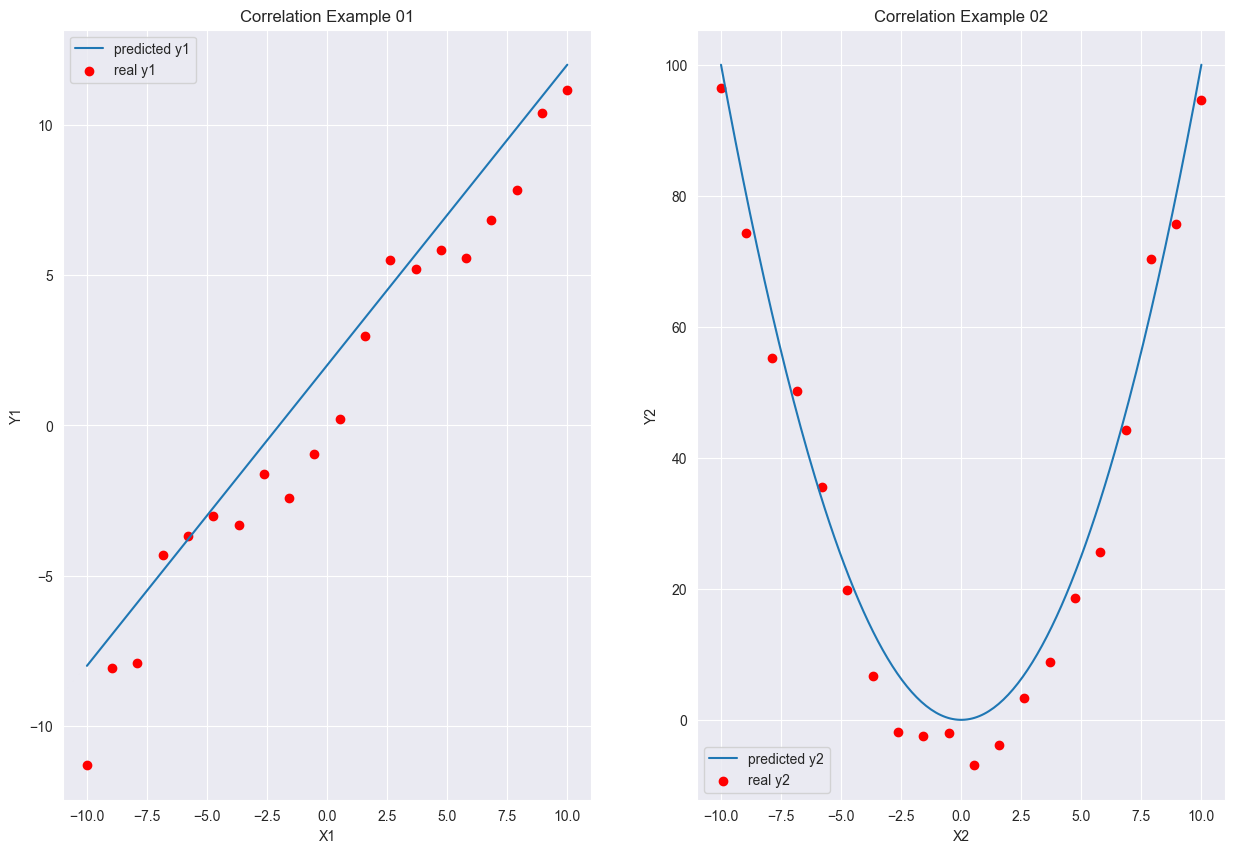

In [9]:
x = np.linspace(-10, 10, 20)
y1 = x + 2
y1_scatter = y1 + np.random.normal(-1.0, 1.0, 20)

# x2는 여전히 많은 포인트로 부드러운 곡선을 그리기 위해 200개 유지
x2 = np.linspace(-10, 10, 200)
y2 = x2**2

# 산점도용 데이터는 20개만 생성
x2_scatter = np.linspace(-10, 10, 20)  # 20개의 x 값만 생성
y2_scatter = x2_scatter**2 + np.random.normal(-4.0, 4.0, 20)  # 20개의 y 값 생성

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.plot(x, y1, label="predicted y1")
plt.scatter(x, y1_scatter, label="real y1", color="red")
plt.xlabel("X1")
plt.ylabel("Y1")
plt.title("Correlation Example 01")
plt.legend()

plt.subplot(122)
plt.plot(x2, y2, label="predicted y2")  # 부드러운 2차 함수 곡선 (200 포인트)
plt.scatter(x2_scatter, y2_scatter, label="real y2", color="red")  # 20개의 산점도
plt.xlabel("X2")
plt.ylabel("Y2")
plt.title("Correlation Example 02")
plt.legend()

plt.show()

In [10]:
print("'Correlation Example 01' 에서 X1 과 Y1 의 상관계수:", np.corrcoef(x, y1_scatter)[0, 1])
print("'Correlation Example 02' 에서 X2 와 Y2 의 상관계수:", np.corrcoef(x2_scatter, y2_scatter)[0, 1])

'Correlation Example 01' 에서 X1 과 Y1 의 상관계수: 0.9841885901076726
'Correlation Example 02' 에서 X2 와 Y2 의 상관계수: 0.006311867872006309


## 등분산성과 이분산성

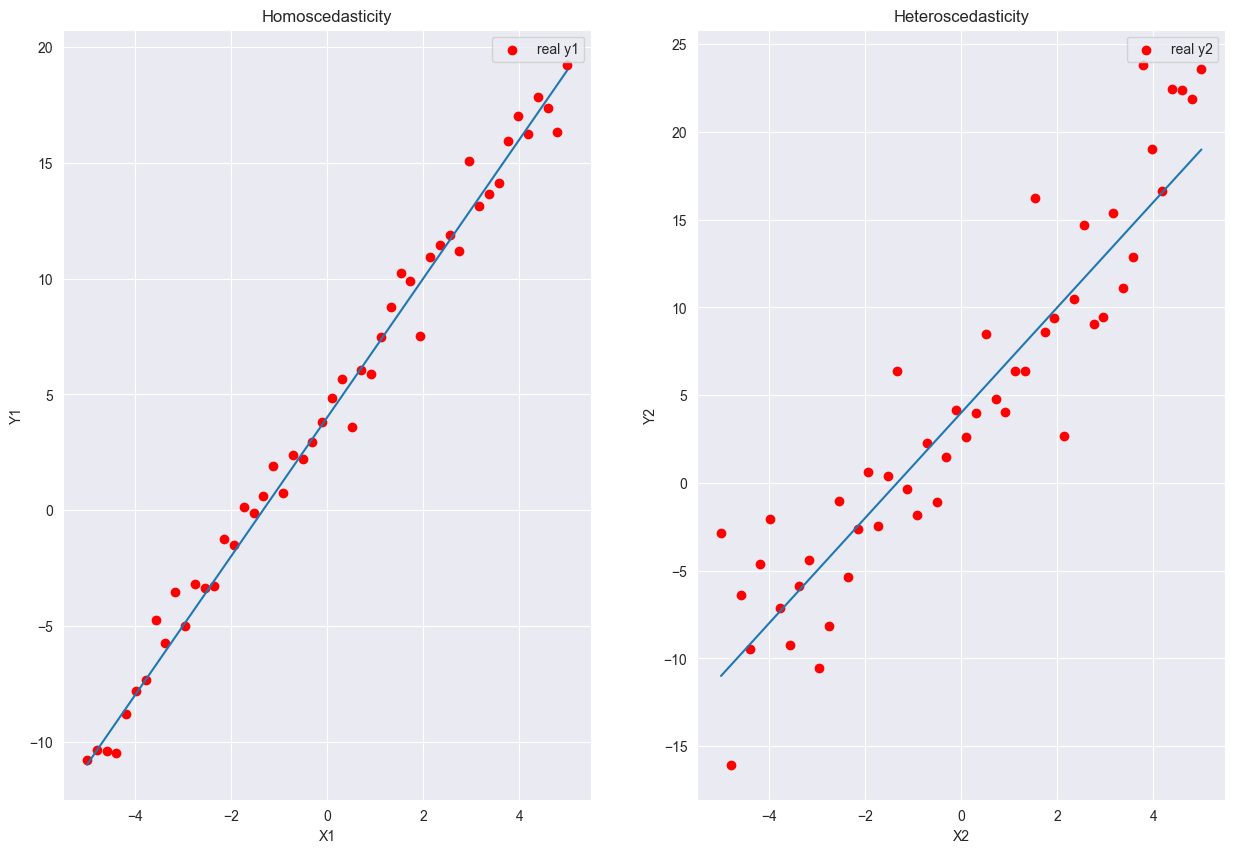

In [11]:
x1 = np.linspace(-5, 5, 50)
y1 = 3 * x1 + 4
y1_scatter = y1 + np.random.normal(0, 1, 50)
y2_scatter = y1 + np.random.normal(0, 3, 50)

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.plot(x1, y1)
plt.scatter(x1, y1_scatter, label="real y1", color="red")
plt.xlabel("X1")
plt.ylabel("Y1")
plt.title("Homoscedasticity")
plt.legend()

plt.subplot(122)
plt.plot(x1, y1)
plt.scatter(x1, y2_scatter, label="real y2", color="red")
plt.xlabel("X2")
plt.ylabel("Y2")
plt.title("Heteroscedasticity")
plt.legend()

plt.show()

In [12]:
print("Correlation of Homoscedasticity:", np.corrcoef(x1, y1_scatter)[0, 1])
print("Correlation of Heteroscedasticity:", np.corrcoef(x1, y2_scatter)[0, 1])

Correlation of Homoscedasticity: 0.9943198312004222
Correlation of Heteroscedasticity: 0.9310520543657766


## 선형회귀 모델링 방법론 실습

### 데이터셋 준비

- `sklearn` 에서 제공하는 `diabetes`(당뇨병) 데이터를 가지고 선형 회귀 모델링을 진행한다.
- 데이터 설명('DESCR' 에 있는 내용)

```markdown
- 당뇨병 데이터셋 요약
    - 이 데이터셋은 442명의 당뇨병 환자에 대한 10가지 기준 변수와 1년 후의 질병 진행 상태를 측정한 값을 포함하고 있습니다.

- 데이터셋 특성
    - 사례 수: 442명
    - 속성 수: 처음 10개 열은 수치형 예측 변수
    - 목표 변수: 11번째 열은 기준 시점으로부터 1년 후의 질병 진행 정도를 정량적으로 측정한 값

- 속성 정보
    - age: 나이(년)
    - sex: 성별
    - bmi: 체질량 지수
    - bp: 평균 혈압
    - s1: tc, 총 혈청 콜레스테롤
    - s2: ldl, 저밀도 지단백질
    - s3: hdl, 고밀도 지단백질
    - s4: tch, 총 콜레스테롤/HDL 비율
    - s5: ltg, 혈청 중성지방 수치의 로그값으로 추정됨
    - s6: glu, 혈당 수치

- 참고사항
    - 각 특성 변수는 평균 중심화되었으며, 표준편차와 샘플 수의 제곱근을 곱한 값으로 스케일링되었습니다(즉, 각 열의 제곱합은 1입니다).
    - 즉, scaled 가 True (default)
```

In [13]:
from sklearn.datasets import load_diabetes


# scaled: standardization scaler 를 미리 적용할지 안 할지
# 데이터셋의 전처리를 연습해보기 위해
# `scaled=False` 로 넘겨서 일반적인 데이터셋으로 받도록 함
dataset = load_diabetes(scaled=False)
print(dataset["DESCR"])  # DESCR 은 데이터셋에 대한 설명이 적혀있다.

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [14]:
import pandas as pd


# 전처리 연습해보기(매우 간단한 전처리만 진행)
diabetes_df = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [15]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [16]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


- 표준화하기(Standardization)

`sklearn.preprocessing.StandardScaler` 의 주요 메소드
- `fit(X)`: 데이터로부터 평균과 표준편차를 계산
- `transform(X)`: 계산된 평균과 표준편차를 사용하여 데이터를 변환
- `fit_transform(X)`: fit과 transform을 한 번에 수행
- `inverse_transform(X)`: 표준화된 데이터를 원래 스케일로 되돌리기

`sklearn.preprocessing.StandardScaler` 의 주요 속성
- `mean_`: 데이터의 평균값
- `scale_`: 데이터의 표준편차
- `var_`: 데이터의 분산

In [17]:
from sklearn.preprocessing import StandardScaler


standard_scaler = StandardScaler()

# standard_scaler.fit_transform(X)
# X: array-like of shape (n_samples, n_features)
# return ndarray
diabetes_df.loc[:, :] = standard_scaler.fit_transform(diabetes_df)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [18]:
diabetes_df.describe()  # 모든 feature 가 평균은 0, 표준편차는 1이 되었다.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,0.000000,2.250588e-16,-4.726234e-15,-1.008746e-15,-3.054369e-16,8.359326e-16,-1.286050e-16,-1.446806e-16,1.953189e-15,2.250588e-16
std,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040e+00,-2.896390e+00
25%,-0.784172,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.989486e-01,-6.975491e-01
50%,0.113172,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.093693e-02,-2.265729e-02
75%,0.800500,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818506e-01,5.869224e-01
max,2.327895,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722e+00,2.851075e+00


In [19]:
# target 은 1년 후의 질병 진행 정도를 정량적으로 측정한 값
target = dataset["target"]
print("type:", type(target), "shape:", target.shape)
target[:10]

type: <class 'numpy.ndarray'> shape: (442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [20]:
# target 도 표준화 진행
# 2 차원 ndarray 를 받으므로, reshape
target = standard_scaler.fit_transform(target.reshape(-1, 1))
target = target.reshape(-1)
print("target 의 평균:", target.mean(), "표준편차:", target.std())
target[:10]

target 의 평균: -1.687940888117885e-16 표준편차: 1.0


array([-0.01471948, -1.00165882, -0.14457991,  0.69951294, -0.22249618,
       -0.71596585, -0.18353805, -1.15749134, -0.54714728,  2.05006151])

### 데이터셋 분할
- train 데이터셋과 test 데이터셋으로 나눈다.

In [21]:
from sklearn.model_selection import train_test_split


# random_state 인자를 넣어서, 실행할 때 마다 같은 값이 나오도록 함
random_state = 1234
train_x, test_x, train_y, test_y = train_test_split(diabetes_df, target, test_size=0.2, random_state=random_state)

print("train_x 의 shape:", train_x.shape)
print("test_x 의 shape:", test_x.shape)
print("train_y 의 shape:", train_y.shape)
print("test_y 의 shape:", test_x.shape)

train_x 의 shape: (353, 10)
test_x 의 shape: (89, 10)
train_y 의 shape: (353,)
test_y 의 shape: (89, 10)


### 선형 회귀 모델 학습

- sklearn 의 LinearRegression 을 활용

In [22]:
from sklearn.linear_model import LinearRegression


# (다중) 선형회귀 모델 초기화
multi_regressor = LinearRegression()

# train 데이터셋으로 학습 진행
multi_regressor.fit(train_x, train_y)

# 회귀식은 y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
# 데이터셋(features 와 target 모두)을 표준화 했으므로, 0 에 가까운 값이 나온다.
print("intercept(회귀식의 β₀):", multi_regressor.intercept_)
# 특성이 모두 10개 이므로, 10개의 weight 가 나온다.
print("coefficients(회귀식의 β₁, β₂, ..., βₙ):", multi_regressor.coef_)

intercept(회귀식의 β₀): 0.01748159327780493
coefficients(회귀식의 β₁, β₂, ..., βₙ): [-0.02683989 -0.17329413  0.32674676  0.2140219  -0.63762186  0.4086212
  0.14890333  0.14856838  0.49305931  0.07608121]


### 학습 결과 확인

- 예측값과 목표값을 비교해서 MSE 값을 계산하기

In [23]:
from sklearn.metrics import mean_squared_error


train_y_pred = multi_regressor.predict(train_x)
test_y_pred = multi_regressor.predict(test_x)

print("MSE of Train Data:", mean_squared_error(train_y_pred, train_y))
print("MSE of Test Data:", mean_squared_error(test_y_pred, test_y))

MSE of Train Data: 0.48075244266801054
MSE of Test Data: 0.5017654355822639


In [24]:
test_y_pred.shape, test_x.shape

((89,), (89, 10))

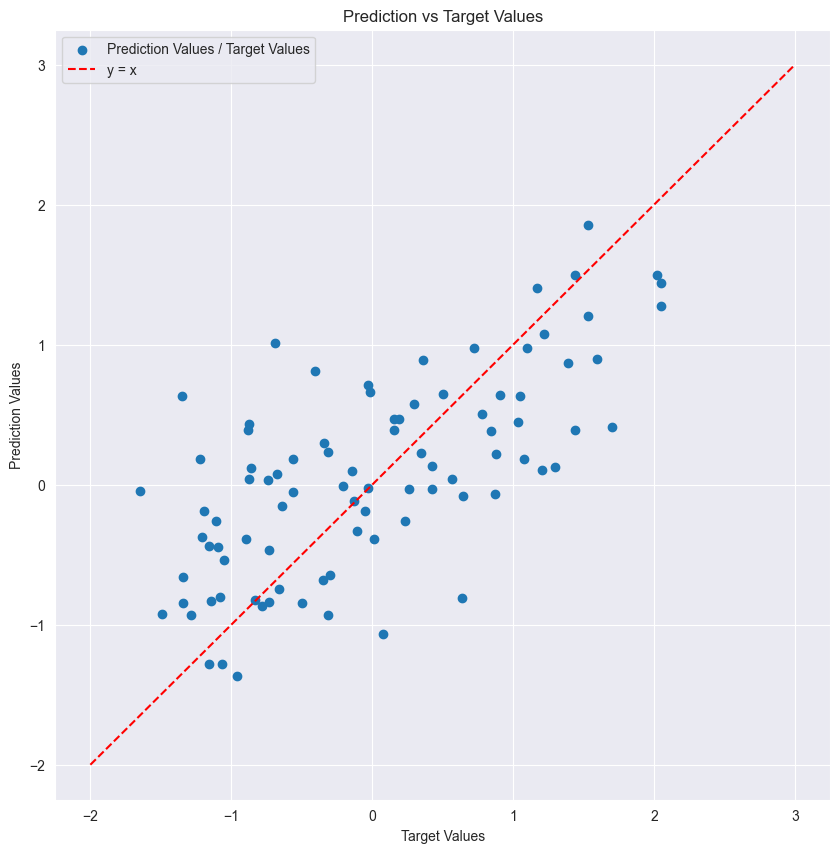

In [25]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
plt.scatter(test_y, test_y_pred, label="Prediction Values / Target Values")
plt.plot([-2, 3], [-2, 3], linestyle="--", color="red", label="y = x")


plt.xlabel("Target Values")
plt.ylabel("Prediction Values")
plt.title("Prediction vs Target Values")
plt.legend()
plt.show()

### 해석적 해법으로 선형 회귀 모델 만들어보기!

$$ \theta = (X^T X)^{-1} X^T y $$

In [26]:
# 1. 위 식을 Ax = b 의 형태로 변형
A = train_x.T @ train_x
b = train_x.T @ train_y

# numpy 를 활용해 linear equation 풀기
coef = np.linalg.solve(A, b)


def predict(data, parameters):
    """학습된 parameter 를 이용해서 예측값을 내놓는 함수"""
    return data @ parameters


train_pred = predict(train_x, coef)  # train 데이터에 대한 예측값 계산
test_pred = predict(test_x, coef)  # test 데이터에 대한 예측값 계산

# MSE 값 계산
train_mse = mean_squared_error(train_pred, train_y)
test_mse = mean_squared_error(test_pred, test_y)

print("MSE of Train Data:", train_mse)
print("MSE of Test Data:", test_mse)

MSE of Train Data: 0.4810571061452473
MSE of Test Data: 0.49908481853640374


In [27]:
print("scikit-learn 패키지를 활용한 모델의 params:", multi_regressor.coef_)
print("해석적 해법으로 직접 계산한 모델의 params:", coef)
# 해석적 해법을 통해 구한 파라미터와
# scikit-learn 패키지를 사용해 구한 파라미터의
# 오차가 거의 없는 것을 알 수 있다.

scikit-learn 패키지를 활용한 모델의 params: [-0.02683989 -0.17329413  0.32674676  0.2140219  -0.63762186  0.4086212
  0.14890333  0.14856838  0.49305931  0.07608121]
해석적 해법으로 직접 계산한 모델의 params: [-0.02681073 -0.17372221  0.32588074  0.21370152 -0.63822246  0.40874389
  0.14928266  0.14943948  0.49328286  0.07641088]


## 상관행렬의 시각화

- `seaborn` 의 `hitmap()` 을 이용해서 시각화

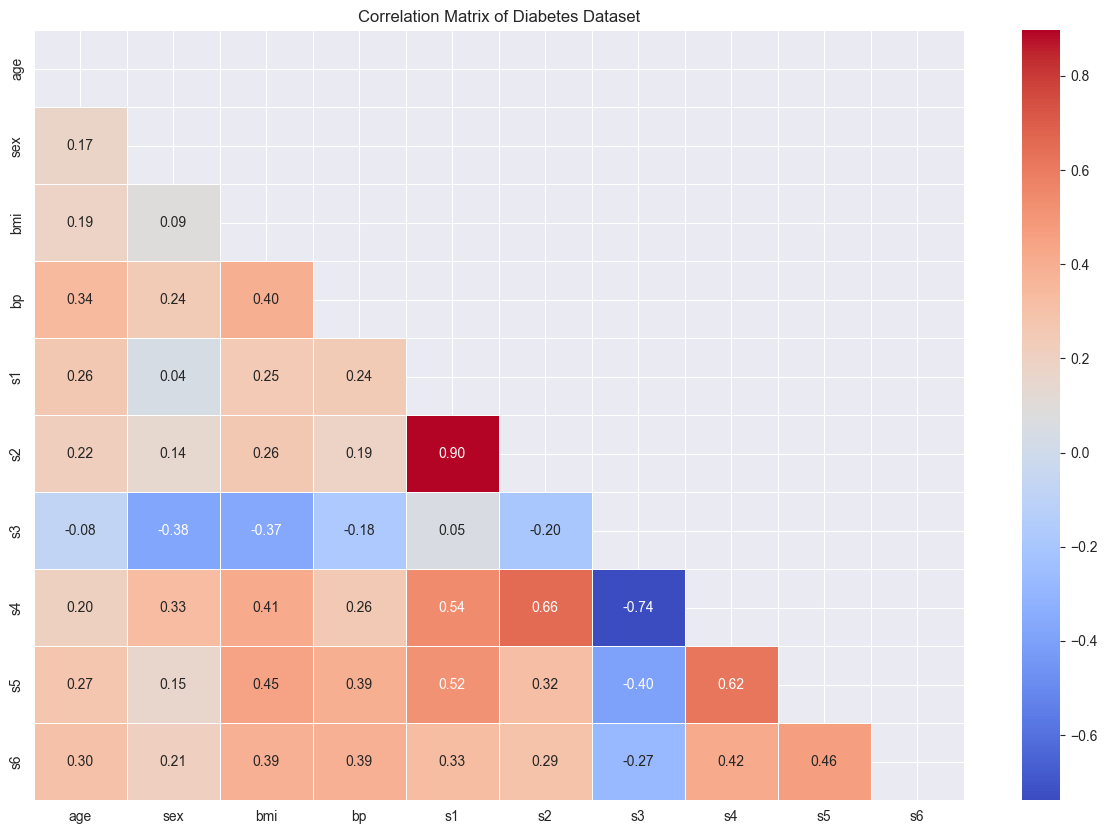

In [29]:
import seaborn as sns


# pd.DataFrame 의 corr() 함수를 이용해서 상관행렬 만들기
corr = diabetes_df.corr(numeric_only=True)

# figure 에서 생략될 부분을 지정하는 mask 행렬 생성; 보여줄 부분만 1 로 채우고 나머지는 0인 행렬

# np.ones_lie(): 주어진 배열과 동일한 shape 와 dtype 을 가진
#                새로운 배열을 생성하는데, 모든 값을 1로 채움
mask = np.ones_like(corr, dtype=bool)
# np.triu(): "triangular upper"의 약자로,
#            행렬의 상삼각(upper triangular) 부분만 남기고
#            나머지는 0으로 채우는 함수(이와 반대인 tril 도 있음)
mask = np.triu(mask)

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, mask=mask, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

### 단순 선형회귀 분석 실습

- 위 상관행렬에서 강한 상관관계를 보이는 s1 과 s2 로 단순 선형회귀 해보기

In [32]:
x_feature = diabetes_df[["s1"]]
y_feature = diabetes_df[["s2"]]

simple_regressor = LinearRegression()
simple_regressor.fit(x_feature, y_feature)

# 표준화를 미리 진행했기때문에,
# 위 상관행렬에서 보이는 상관계수와
# 선형 회귀 모델의 회귀계수가 비슷한 값이다.
print("s1 과 s2 의 단순 선형회귀 모델의 parameter:", simple_regressor.coef_)

s1 과 s2 의 단순 선형회귀 모델의 parameter: [[0.89666296]]
